# Анализ зарплат в России

Для анализа будем использовать официальные источники: Среднемесячная номинальная начисленная заработная плата работников организаций по видам экономической деятельности в Российской Федерации за 2000-2023 гг.
[(по ссылке)](https://rosstat.gov.ru/storage/mediabank/tab3-zpl_2023.xlsx) и данные об уровне инфляции [(по ссылке)](https://уровень-инфляции.рф/%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B-%D0%B8%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D0%B8).

Данные о зарплатах поделены на 2 листа: с 2000 по 2016 год и с 2017 по 2023 год. Виды деятельности поменялись на этих двух листах. Но некоторые не поменялиь, например образование, медицина, строительсто и добыча полезных ископаемых. Их мы и попробуем проанализировать. Для удобства перенесем данные об этих видах деятельности в отдельный файл. 

Данные об инфляции ограничим 2000-2023 годами и также перенесем в отдельный файл. 

## Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Зарплаты

In [2]:
df_salary = pd.read_csv('data/salary.csv')
df_salary

,Год,Добыча полезных ископаемых,Строительство,Образование,Здравоохранение и предоставление социальных услуг
0,2000,5940,2640,1240,1333
1,2001,9099,3859,1833,1960
2,2002,11081,4807,2927,3141
3,2003,13912,6177,3387,3663
4,2004,16842,7305,4203,4612
5,2005,19727,9043,5430,5906
6,2006,23145,10869,6983,8060
7,2007,28108,14333,8778,10037
8,2008,33206,18574,11317,13049
9,2009,35363,18122,13294,14820


### Инфляция

In [3]:
df_inflation = pd.read_csv('data/inflation.csv')
df_inflation

,Год,Всего
0,2000,20.20
1,2001,18.58
2,2002,15.06
3,2003,11.99
4,2004,11.74
5,2005,10.91
6,2006,9.00
7,2007,11.87
8,2008,13.28
9,2009,8.80


## График динамики зарплат по годам

Построим графики динамики зарплат по выбранным видам деятельности с 2000 по 2023 год.

In [4]:
def plot(edu, const, med, oil, y_major, y_minor):
    fig = plt.figure(figsize=(8,6))
    ax = fig.subplots()
    plt.plot(df_salary['Год'], edu, color='b', label='edu')
    plt.plot(df_salary['Год'], const, color='r', label='construction')
    plt.plot(df_salary['Год'], med, color='g', label='medicine')
    plt.plot(df_salary['Год'], oil, color='k', label='oil')
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(y_major))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(y_minor))
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')

    plt.legend()
    plt.show()

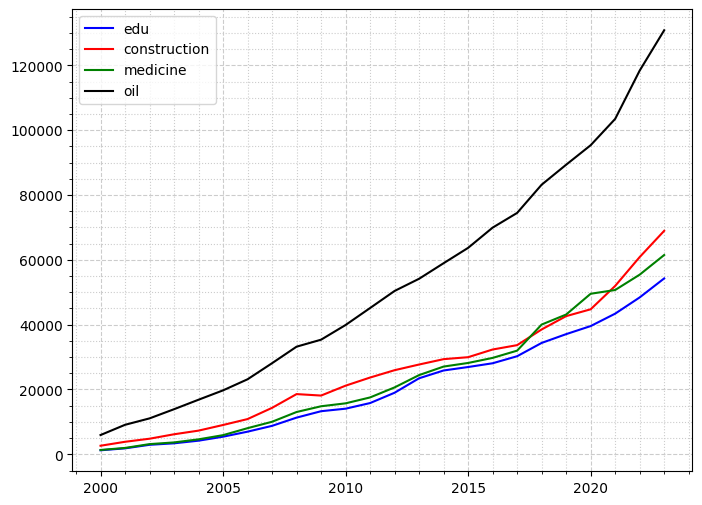

In [5]:
plot(df_salary['Образование'], 
     df_salary['Строительство'], 
     df_salary['Здравоохранение и предоставление социальных услуг'], 
     df_salary['Добыча полезных ископаемых'], 20000, 5000)

Все графики достаточно сглажены, нет больших скачков и провалов в зарплатах. Если сравнивать по видам деятельности, то можно заметить, что графики зарплат в сфере образования, медицины и строительства очень похожи. Хуже всего с зарплатами в сфере образования. Также в этих сферах наблюдается большой разрыв в зарплатах относительно сферы добычи полезных ископаемых.

## Пересчет зарплат с учетом инфляции
Чтобы понять, какова была динамика зарплат с учетом инфляции, нам нужно пересчитать все зарплаты на цены 2000 года. 
Чтобы это сделать, мы выполним следующий шаги:
1. Посчитаем, какая была бы зарплата относительно 2000 года, если бы она каждый год увеличивалась только на размер инфляции.
2. Получим отношение фактической зарплаты к зарплате, учитывающей только рост инфляции, которую мы получили на шаге 1.
3. Умножаем коэффициент, полученный на шаге 2, на зарплату в 2000 году.

### Шаг 1. Какая была бы зарплата относительно 2000 года, если бы она каждый год увеличивалась только на размер инфляции
Для этого мы для каждой сферы деятельности будем умножать зарплату в предыдущем году на уровень инфляции в текущем году. Зарплату в 2000 году оставим как есть.

In [6]:
df_sal_infl = pd.DataFrame(columns=['oil', 'const', 'edu', 'med'])
df_sal_infl.loc[0] = [df_salary['Добыча полезных ископаемых'][0], 
                      df_salary['Строительство'][0], 
                      df_salary['Образование'][0], 
                      df_salary['Здравоохранение и предоставление социальных услуг'][0]]
for i in range(1, 24):
    infl_i = (1 + df_inflation['Всего'][i - 1] / 100)
    df_sal_infl.loc[i] = [df_sal_infl['oil'][i - 1] * infl_i, 
                          df_sal_infl['const'][i - 1] * infl_i, 
                          df_sal_infl['edu'][i - 1] * infl_i, 
                          df_sal_infl['med'][i - 1] * infl_i]
df_sal_infl

,oil,const,edu,med
0,5940.000000,2640.000000,1240.000000,1333.000000
1,7139.880000,3173.280000,1490.480000,1602.266000
2,8466.469704,3762.875424,1767.411184,1899.967023
3,9741.520041,4329.564463,2033.583308,2186.102056
4,10909.528294,4848.679242,2277.409947,2448.215693
5,12190.306916,5417.914185,2544.777875,2735.636215
6,13520.269401,6009.008623,2822.413141,3034.094126
7,14737.093647,6549.819399,3076.430324,3307.162598
8,16486.386663,7327.282961,3441.602603,3699.722798
9,18675.778811,8300.346138,3898.647429,4191.045986


Построим и эти графики.

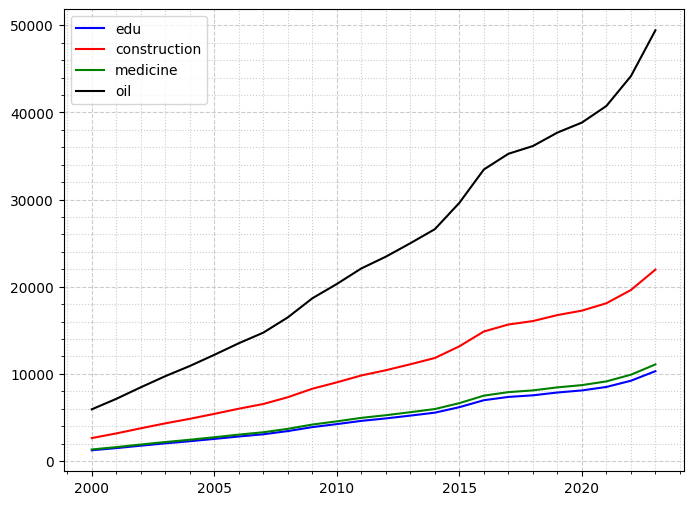

In [7]:
plot(df_sal_infl['edu'], df_sal_infl['const'], df_sal_infl['med'], df_sal_infl['oil'], 10000, 2000)

Из этих данных можно сделать вывод, что реальный рост зарплат все таки происходит на уровне выше, чем инфляция. Это видно, если сравнить этот график с графиком фактических зарплат за этот же период. Так, например, в сфере образования и медицины при увеличении зарплат только на уровень инфляции зарплата составляла бы в 2023 году около 11 тыс. рублей, хотя фактическая зарплата в этих сферах в 2023 году составляет около 55 и 62 тыс. рублей соответственно.

### Шаг 2. Отношение фактической зарплаты к зарплате, учитывающей только рост инфляции

In [8]:
df_infl_koeff = pd.DataFrame(columns=['oil', 'const', 'edu', 'med'])
for i in range(24):
    df_infl_koeff.loc[i] = [df_salary['Добыча полезных ископаемых'][i] / df_sal_infl['oil'][i], 
                            df_salary['Строительство'][i] / df_sal_infl['const'][i], 
                            df_salary['Образование'][i] / df_sal_infl['edu'][i], 
                            df_salary['Здравоохранение и предоставление социальных услуг'][i] / df_sal_infl['med'][i]]
df_infl_koeff

,oil,const,edu,med
0,1.000000,1.000000,1.000000,1.000000
1,1.274391,1.216092,1.229805,1.223268
2,1.308810,1.277481,1.656095,1.653187
3,1.428114,1.426702,1.665533,1.675585
4,1.543788,1.506596,1.845518,1.883821
5,1.618253,1.669093,2.133782,2.158913
6,1.711874,1.808784,2.474124,2.656477
7,1.907296,2.188305,2.853307,3.034928
8,2.014147,2.534910,3.288294,3.527021
9,1.893522,2.183282,3.409901,3.536110


Постоим графики.

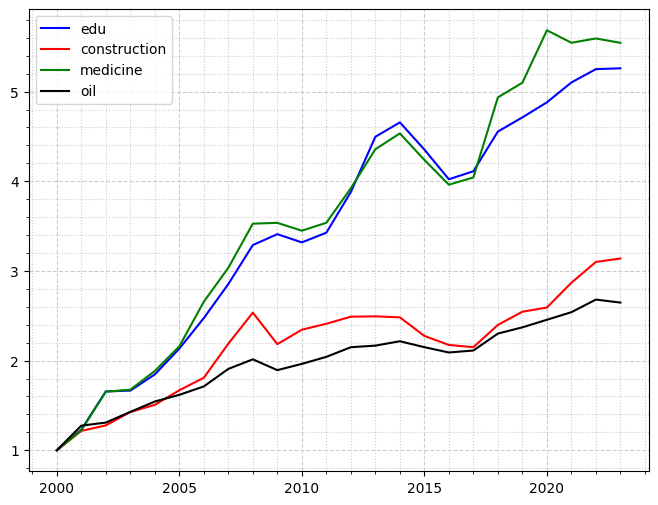

In [9]:
plot(df_infl_koeff['edu'], df_infl_koeff['const'], df_infl_koeff['med'], df_infl_koeff['oil'], 1, 0.2)

Если посмотреть на этот график, получается, что рост зарплат относительно 2000 года в сферах образования и медицины происходил значительнее, чем в строительстве и добыче полезных ископаемых. Хотя еще можно заметить, что в 2015-2017 годах для медицины и образования на графике наблюдается гораздо более видимый провал, чем для строительства и добычи полезных ископаемых. Также для этих сфер наблюдается небольшой провал в 2010-2011 году, а для строительства и добычи полезных ископаемых небольшой провал наблюдается чуть раньше, в 2009-2010 году.

### Шаг 3. Зарплата в период 2000-2023 в ценах 2000 года 
Умножаем зарплату в 2000 году на коэффициент, полученный на шаге 2.

In [10]:
df_sal_2000 = pd.DataFrame(columns=['oil', 'const', 'edu', 'med'])
sal_oil_2000 = df_salary['Добыча полезных ископаемых'][0]
sal_const_2000 = df_salary['Строительство'][0]
sal_edu_2000 = df_salary['Образование'][0]
sal_med_2000 = df_salary['Здравоохранение и предоставление социальных услуг'][0]
for i in range(24):    
    df_sal_2000.loc[i] = [sal_oil_2000 * df_infl_koeff['oil'][i], 
                          sal_const_2000 * df_infl_koeff['const'][i], 
                          sal_edu_2000 * df_infl_koeff['edu'][i], 
                          sal_med_2000 * df_infl_koeff['med'][i]]
df_sal_2000

,oil,const,edu,med
0,5940.000000,2640.000000,1240.000000,1333.000000
1,7569.883527,3210.482529,1524.958403,1630.615641
2,7774.331250,3372.548535,2053.557221,2203.697722
3,8482.996457,3766.494330,2065.260854,2233.554918
4,9170.101337,3977.413031,2288.441748,2511.133319
5,9612.422460,4406.404233,2645.889084,2877.830742
6,10168.532588,4775.190352,3067.913721,3541.083286
7,11329.338335,5777.124177,3538.100609,4045.558875
8,11964.030933,6692.161373,4077.484131,4701.518992
9,11247.521301,5763.865651,4228.276678,4713.634751


Построим графики.

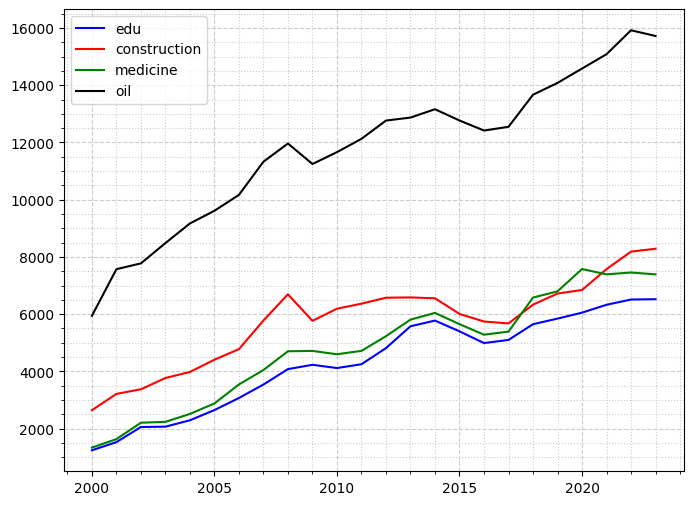

In [11]:
plot(df_sal_2000['edu'], df_sal_2000['const'], df_sal_2000['med'], df_sal_2000['oil'], 2000, 500)

Если посмотреть значения для 2023 года, то полученные значения примерно в 10 раз меньше фактических зарплат. Также на этих графиках гораздо заметнее скачки и провалы в уровнях зарплат. Так, например, хорошо заметен скачок в сфере строительства и добычи полезных ископаемых в 2008 году, а также провал в 2015-2017 годах во всех сферах. Также виден спад в сфере добычи полезных ископаемых в 2023 году, а в сфере медицины спад наблюдается с 2020 года. В сферах образования и строительства не наблюдается большого роста с 2022 года.

## Сравнение фактических зарплат с зарплатами с учетом инфляции по сферам деятельности

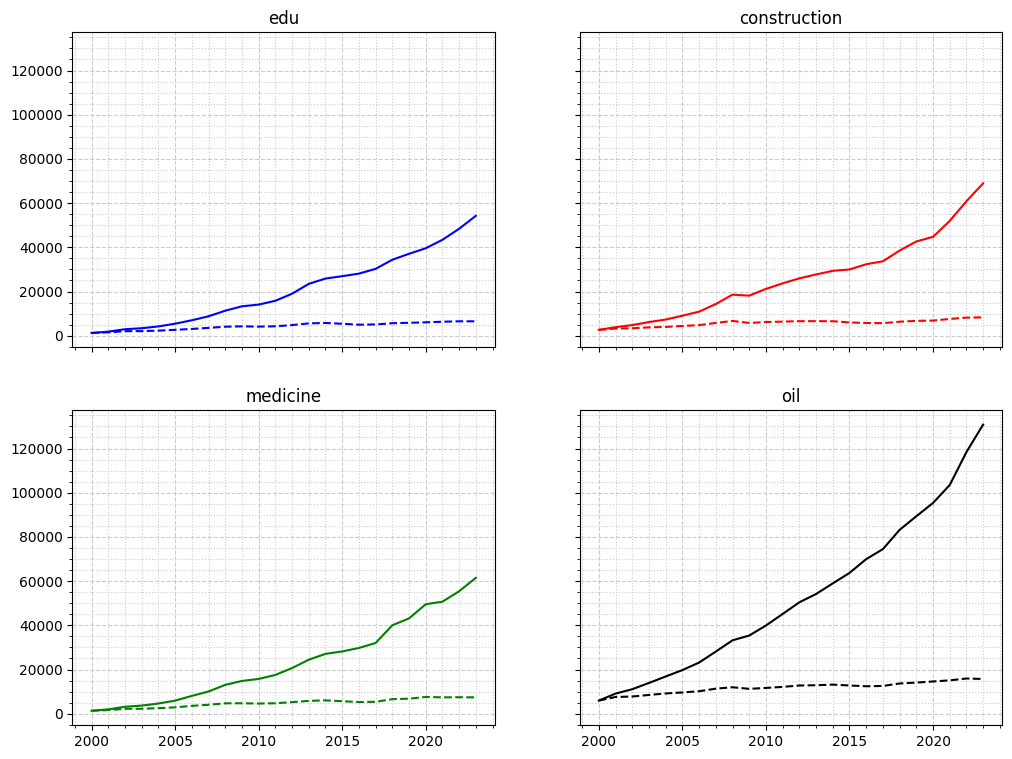

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,9))

ax1.plot(df_salary['Год'], df_salary['Образование'], color='b')
ax1.plot(df_salary['Год'], df_sal_2000['edu'], color='b', linestyle='--')
ax1.set_title('edu')

ax2.plot(df_salary['Год'], df_salary['Строительство'], color='r')
ax2.plot(df_salary['Год'], df_sal_2000['const'], color='r', linestyle='--')
ax2.set_title('construction')

ax3.plot(df_salary['Год'], df_salary['Здравоохранение и предоставление социальных услуг'], color='g')
ax3.plot(df_salary['Год'], df_sal_2000['med'], color='g', linestyle='--')
ax3.set_title('medicine')

ax4.plot(df_salary['Год'], df_salary['Добыча полезных ископаемых'], color='k')
ax4.plot(df_salary['Год'], df_sal_2000['oil'], color='k', linestyle='--')
ax4.set_title('oil')

for ax in fig.get_axes():
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(20000))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(5000))
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')

По результатам анализа можно сделать следующие выводы:
1. Во всех рассматриваемых сферах произошел рост реальных зарплат (с учетом инфляции) относительно 2000 года.
2. Если рассматривать графики без учета инфляции, не заметны провалы и скачки зарплат, график выглядит сглаженным.
3. Хотя в сфере образования, медицины и в меньшей степени в строительстве наблюдается более значительный рост реальных зарплат относительно 2000 года, чем в добыче полезных ископаемых, все еще сохраняется значительный разрыв в зарплатах в этих сферах деятельности относительно добычи полезных ископаемых.

Расчеты основаны на [статье](https://journal.tinkoff.ru/ask/calc-salary/). 